In [37]:
import math 
import numpy as np
import matplotlib.pyplot as plt
w0 = [1,0,0,0]
w1 = [0,1,0,0]
w2 = [0,0,1,0]
w3 = [0,0,0,1]
w4 = [-1,1,-1,1]
w5 = [-1,0,0,0]
w6 = [0,-1,0,0]
w7 = [0,0,-1,0]
w8 = [0,0,0,-1]
w9 =[1,-1,1,-1]

# v_1_g  = [1, 1, -1, 0] # 1  => w0 + w1 + w7   Rot(1)
# v_z_g  = [0, 1, 1, -1]  # z  => w1 + w2 + w8
# v_z2_g = [1, -1, 2, 0]  # z2 => w2 + w3 + w9
# v_z3_g = [0, 1, -1, 2] # z3 => w3 + w4 + w0

v_1_g  = [1, 0, 1, -1] # 1  => 1 + w2 + w8   Rot(1)
v_z_g  = [1, 0, 1, 0]  # z  => w + w3 + w9
v_z2_g = [0, 1, 0, 1]  # z2 => w2 + w4 + w0
v_z3_g = [-1, 1, 0, 1] # z3 => w3 + w5 + w1

edges = []
def add_edge(v1, v2,color='k-'):
    edges.append((v1, v2))
    plt.plot([v1[0], v2[0]], [v1[1], v2[1]], color)
    #plt.axis('equal')
    
R=[[0,1,0,0], [0,0,1,0],[0,0,0,1],[-1,1,-1,1]] # Matriz de rotación 
W= np.array([[1, 0],[math.cos(36*math.pi/180), math.sin(36*math.pi/180)],[math.cos(72*math.pi/180), math.sin(72*math.pi/180)],[math.cos(108*math.pi/180), math.sin(108*math.pi/180)]]) #Matriz de Mapeo

O=[0,0,0,0] #origen
origin = [1,2,3,4]
v_originales  = [O,w0,[1,-1,1,0],w2] #dart
v_originaless = [O,w0,w1,w2] #kite
translation_vector = [x - y for x, y in zip(origin, [0, 0, 0, 0])] #se lo sumas al origin


def vertices_tras(v_originales_new, translation_vector,f,t):
    translated_vertices_new= [[[x + y for x, y in zip(vertex, translation_vector)] for vertex in v_originales_new],0,f,t]
    return translated_vertices_new

translated_vertices_new1N=vertices_tras(v_originales, translation_vector,0,0)
translated_vertices_new1d1N=vertices_tras(v_originaless, translation_vector,0,0)

In [38]:
L_ss=[]
def graficaR2N(L):
    Lx=[]
    Ly=[]
    ss=[np.dot(k,W) for k in L]
    L_ss.append(ss)
    for k in range(len(ss)):
        add_edge(ss[k], ss[k-1], 'k-')
        Lx.append(ss[k][0])
        Ly.append(ss[k][1])
    return L_ss, Lx, Ly
def inf_v(vertices):
    v_inflados = []
    for i in range(len(vertices)):
        result = np.dot(vertices[i][0], v_1_g) + np.dot(vertices[i][1], v_z_g) + np.dot(vertices[i][2], v_z2_g) + np.dot(vertices[i][3], v_z3_g)
        v_inflados.append(result)
    return v_inflados
def ShiftssN(vertices, shift_vector, val):
    shift = vertices[0] + np.dot(shift_vector, np.linalg.matrix_power(R, val))
    return shift

def GenverticesN(vecO, orient, shift_Mif, f, tipo):
    Rt = np.linalg.matrix_power(R, orient)
    trans = [np.dot(i, Rt) for i in vecO]
    transs = [[np.add(s, shift_Mif[0]) for s in trans], orient, f[1], tipo]
    return transs

NameError: name 'mckk' is not defined

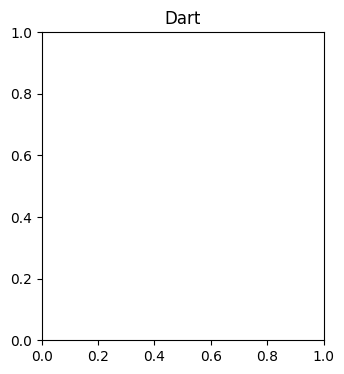

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot the first set of vertices (color #ce1440) in the first subplot
plt.subplot(1, 2, 1)
plt.title("Dart")
for i in range(len(mckk)):
    add_edge(mckk[i], mckk[i-1], color='#ce1440')
    plt.scatter(mckk[i][0], mckk[i][1], color='#ce1440')  # Add a dot at each vertex
    plt.text(mckk[i][0], mckk[i][1], f'', color='#ce1440', fontsize=8, ha='right', va='bottom')  # Add label for each vertex
plt.xticks([])  # Remove X axis ticks
plt.yticks([])  # Remove Y axis ticks
plt.axis('off')  # Remove the square frame

# Plot the second set of vertices (color #ce1440) in the second subplot
plt.subplot(1, 2, 2)
plt.title("Kite")
for i in range(len(mckk1)):
    add_edge(mckk1[i], mckk1[i-1], color='#4c0012')
    plt.scatter(mckk1[i][0], mckk1[i][1], color='#4c0012')  # Add a dot at each vertex
    plt.text(mckk1[i][0], mckk1[i][1], f'', color='#4c0012', fontsize=8, ha='right', va='bottom')  # Add label for each vertex
plt.xticks([])  # Remove X axis ticks
plt.yticks([])  # Remove Y axis ticks
plt.axis('off')  # Remove the square frame

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Set the figure size
plt.figure(figsize=(8, 4))

# Plot the first set of vertices (magenta) in the first subplot
plt.subplot(1, 2, 1)
plt.title("Dart")
for i in range(len(mckk)):
    add_edge(mckk[i], mckk[i-1], 'k-')
    plt.scatter(mckk[i][0], mckk[i][1], color='k')  # Add a dot at each vertex
    plt.text(mckk[i][0], mckk[i][1], f'', color='k', fontsize=8, ha='right', va='bottom')  # Add label for each vertex
plt.xticks([])  # Remove X axis ticks
plt.yticks([])  # Remove Y axis ticks
plt.axis('off')  # Remove the square frame
# Plot the second set of vertices (magenta) in the second subplot
plt.subplot(1, 2, 2)
plt.title("Kite")
for i in range(len(mckk1)):
    add_edge(mckk1[i], mckk1[i-1], 'k-')
    plt.scatter(mckk1[i][0], mckk1[i][1], color='k')  # Add a dot at each vertex
    plt.text(mckk1[i][0], mckk1[i][1], f'', color='k', fontsize=8, ha='right', va='bottom')  # Add label for each vertex
plt.xticks([])  # Remove X axis ticks
plt.yticks([])  # Remove Y axis ticks
plt.axis('off')  # Remove the square frame
plt.show()


[[[array([ 0., 10.,  6., 11.]), array([ 0.,  9.,  6., 11.]), array([ 0.,  9.,  7., 10.]), array([ 0., 10.,  6., 10.])], -4, [2, 2, 3, 4], 'Dart1'], [[array([1, 9, 7, 9]), array([ 0, 10,  6, 10]), array([ 1,  9,  6, 10]), array([1, 8, 7, 9])], 4, [2, 2, 3, 4], 'Dart2'], [[array([ 0,  9,  6, 10]), array([ 1,  9,  6, 10]), array([ 0, 10,  6, 10]), array([ 0,  9,  7, 10])], 0, [2, 2, 3, 4], 'Kitem']]


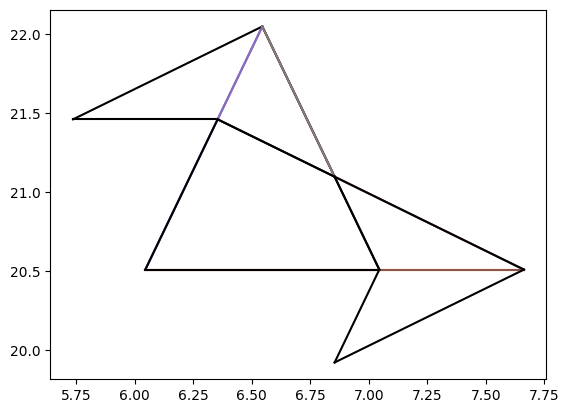

In [40]:
def Dart1a(Lvec):
    for j in Lvec:
        v_inflados_Mif=inf_v(j[0])
        v_inflados_tMif = np.add(origin,v_inflados_Mif)
        mii=[np.dot(d,W) for d in v_inflados_tMif]
        for i in range(len(mii)):
            add_edge(mii[i],mii[i-1], '-')
        shifts_Mif=ShiftssN(v_inflados_tMif,inf_v([[0,0,1,0]]),j[1]) #[1,0,1,0]
        L_vertices_Mif=GenverticesN(v_originales,j[1]-4,shifts_Mif,j[0],"Dart1")
        
    return L_vertices_Mif
Drt1=Dart1a([translated_vertices_new1N])
dd=graficaR2N(Drt1[0])

def Dart2a(Lvec):
    for j in Lvec:
        v_inflados_Mif=inf_v(j[0])
        v_inflados_tMif = np.add(origin,v_inflados_Mif)
        mii=[np.dot(d,W) for d in v_inflados_tMif]
        for i in range(len(mii)):
            add_edge(mii[i],mii[i-1], '-')
        shifts_Mif=ShiftssN(v_inflados_tMif,inf_v([[1,0,0,0]]),j[1]) #[1,0,1,0]
        L_vertices_Mif=GenverticesN(v_originales,j[1]+4,shifts_Mif,j[0],"Dart2")
    return L_vertices_Mif
Drt2=Dart2a([translated_vertices_new1N])
dd=graficaR2N(Drt2[0])

def Kite1a(Lvec):
    for j in Lvec:
        v_inflados_Mif=inf_v(j[0])
        v_inflados_tMif = np.add(origin,v_inflados_Mif)
        mii=[np.dot(d,W) for d in v_inflados_tMif]
        shifts_Mif=ShiftssN(v_inflados_tMif,inf_v([[0,0,0,0]]),j[1]) #[1,0,1,0]
        L_vertices_Mif=GenverticesN(v_originaless,j[1],shifts_Mif,j[0],"Kitem")
    return L_vertices_Mif
Kt1=Kite1a([translated_vertices_new1d1N])
dd=graficaR2N(Kt1[0])

LDart=[Drt1,Drt2,Kt1]
print(LDart)

[[[array([1, 9, 7, 9]), array([ 1,  9,  7, 10]), array([ 0, 10,  6, 10]), array([0, 9, 7, 9])], 3, [2, 2, 3, 4], 'Kite1'], [[array([ 0., 10.,  6., 11.]), array([ 0., 10.,  5., 11.]), array([ 0., 10.,  6., 10.]), array([ 1.,  9.,  7., 10.])], -3, [2, 2, 3, 4], 'Kite2'], [[array([ 0,  9,  6, 10]), array([ 0, 10,  6, 10]), array([ 0, 10,  5, 11]), array([ 0,  9,  6, 11])], 1, [2, 2, 3, 4], 'Dart1'], [[array([ 0.,  9.,  6., 10.]), array([1., 8., 7., 9.]), array([0., 9., 7., 9.]), array([ 0., 10.,  6., 10.])], -1, [2, 2, 3, 4], 'Dart2']]


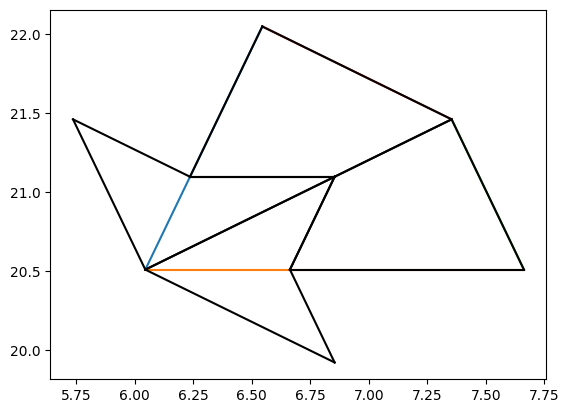

In [41]:
def Kite1(Lvec):
    for j in Lvec:
        v_inflados_Mif=inf_v(j[0])
        v_inflados_tMif = np.add(origin,v_inflados_Mif)
        mii=[np.dot(d,W) for d in v_inflados_tMif]
        for i in range(len(mii)):
            add_edge(mii[i],mii[i-1], '-')
        shifts_Mif=ShiftssN(v_inflados_tMif,inf_v([[1,0,0,0]]),j[1]) #[1,0,1,0]
        L_vertices_Mif=GenverticesN(v_originaless,j[1]+3,shifts_Mif,j[0],"Kite1")
    return L_vertices_Mif
Kt1=Kite1([translated_vertices_new1d1N])
dd=graficaR2N(Kt1[0])

def Kite2(Lvec):
    for j in Lvec:
        v_inflados_Mif=inf_v(j[0])
        v_inflados_tMif = np.add(origin,v_inflados_Mif)
        shifts_Mif=ShiftssN(v_inflados_tMif,inf_v([[0,0,1,0]]),j[1]) #[1,0,1,0]
        L_vertices_Mif=GenverticesN(v_originaless,j[1]-3,shifts_Mif,j[0],"Kite2")
    return L_vertices_Mif
Kt2=Kite2([translated_vertices_new1d1N])
dd=graficaR2N(Kt2[0])

def Dart1(Lvec):
    for j in Lvec:
        v_inflados_Mif=inf_v(j[0])
        v_inflados_tMif = np.add(origin,v_inflados_Mif)
        shifts_Mif=ShiftssN(v_inflados_tMif,inf_v([[0,0,0,0]]),j[1]) #[1,0,1,0]
        L_vertices_Mif=GenverticesN(v_originales,j[1]+1,shifts_Mif,j[0],"Dart1")
        
    return L_vertices_Mif
Drt1=Dart1([translated_vertices_new1N])
dd=graficaR2N(Drt1[0])

def Dart2(Lvec):
    for j in Lvec:
        v_inflados_Mif=inf_v(j[0])
        v_inflados_tMif = np.add(origin,v_inflados_Mif)
        shifts_Mif=ShiftssN(v_inflados_tMif,inf_v([[0,0,0,0]]),j[1]) #[1,0,1,0]
        L_vertices_Mif=GenverticesN(v_originales,j[1]-1,shifts_Mif,j[0],"Dart2")
    return L_vertices_Mif
Drt2=Dart2([translated_vertices_new1N])
dd=graficaR2N(Drt2[0])

LKite=[Kt1,Kt2,Drt1,Drt2]
print(LKite)

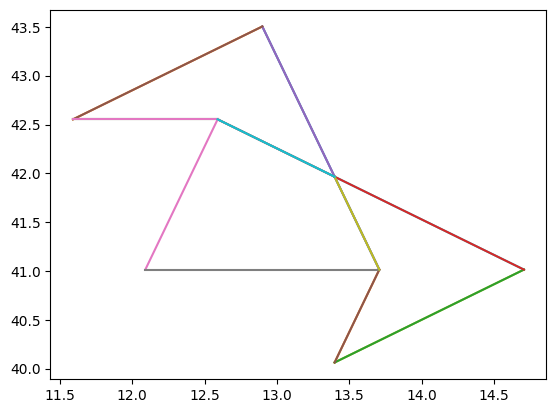

In [42]:
def Inflation1(lvec):
    L=[]
    for j in lvec:
        if j[3]=="Kite1" or j[3]=="Kite2" or j[3]=="Kitem":
            RG1=Kite1([j])
            RG2=Kite2([j])
            L.append(RG1)
            L.append(RG2)
            RD1=Dart1([j])
            L.append(RD1)
            RD2=Dart2([j])
            L.append(RD2)
        if j[3]=="Dart1" or j[3]=="Dart2":
            rD2a=Dart1a([j])
            L.append(rD2a)
            rG1a=Dart2a([j])
            L.append(rG1a)
            rG2a=Kite1a([j])
            L.append(rG2a)
            
    return L
L2=Inflation1(LDart)

0.05401492118835449
0.09335899353027344
0.4245791435241699
1.5483179092407227


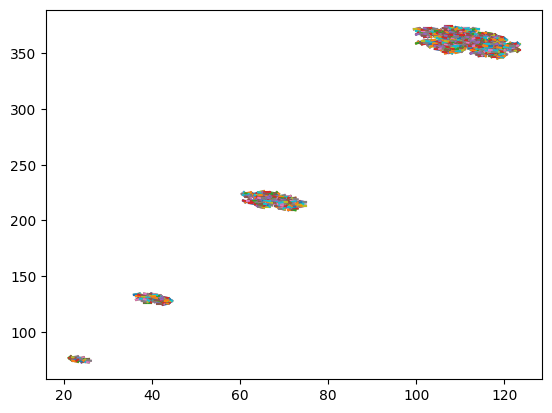

In [43]:
import time
n = 4
for j in range(n):
    start_time = time.time()
    L2 = Inflation1(L2)
    end_time = time.time()
    iteration_time = end_time - start_time
    print(iteration_time)

In [44]:
def remove_duplicates(lvec):
    seen = set()
    result = []
    
    for l in lvec:
        frozen = frozenset(tuple(arr) for arr in l[0])
        if frozen not in seen:
            seen.add(frozen)
            result.append(l)
    
    return result,seen
result,seen=remove_duplicates(L2)
print(len(result))

711


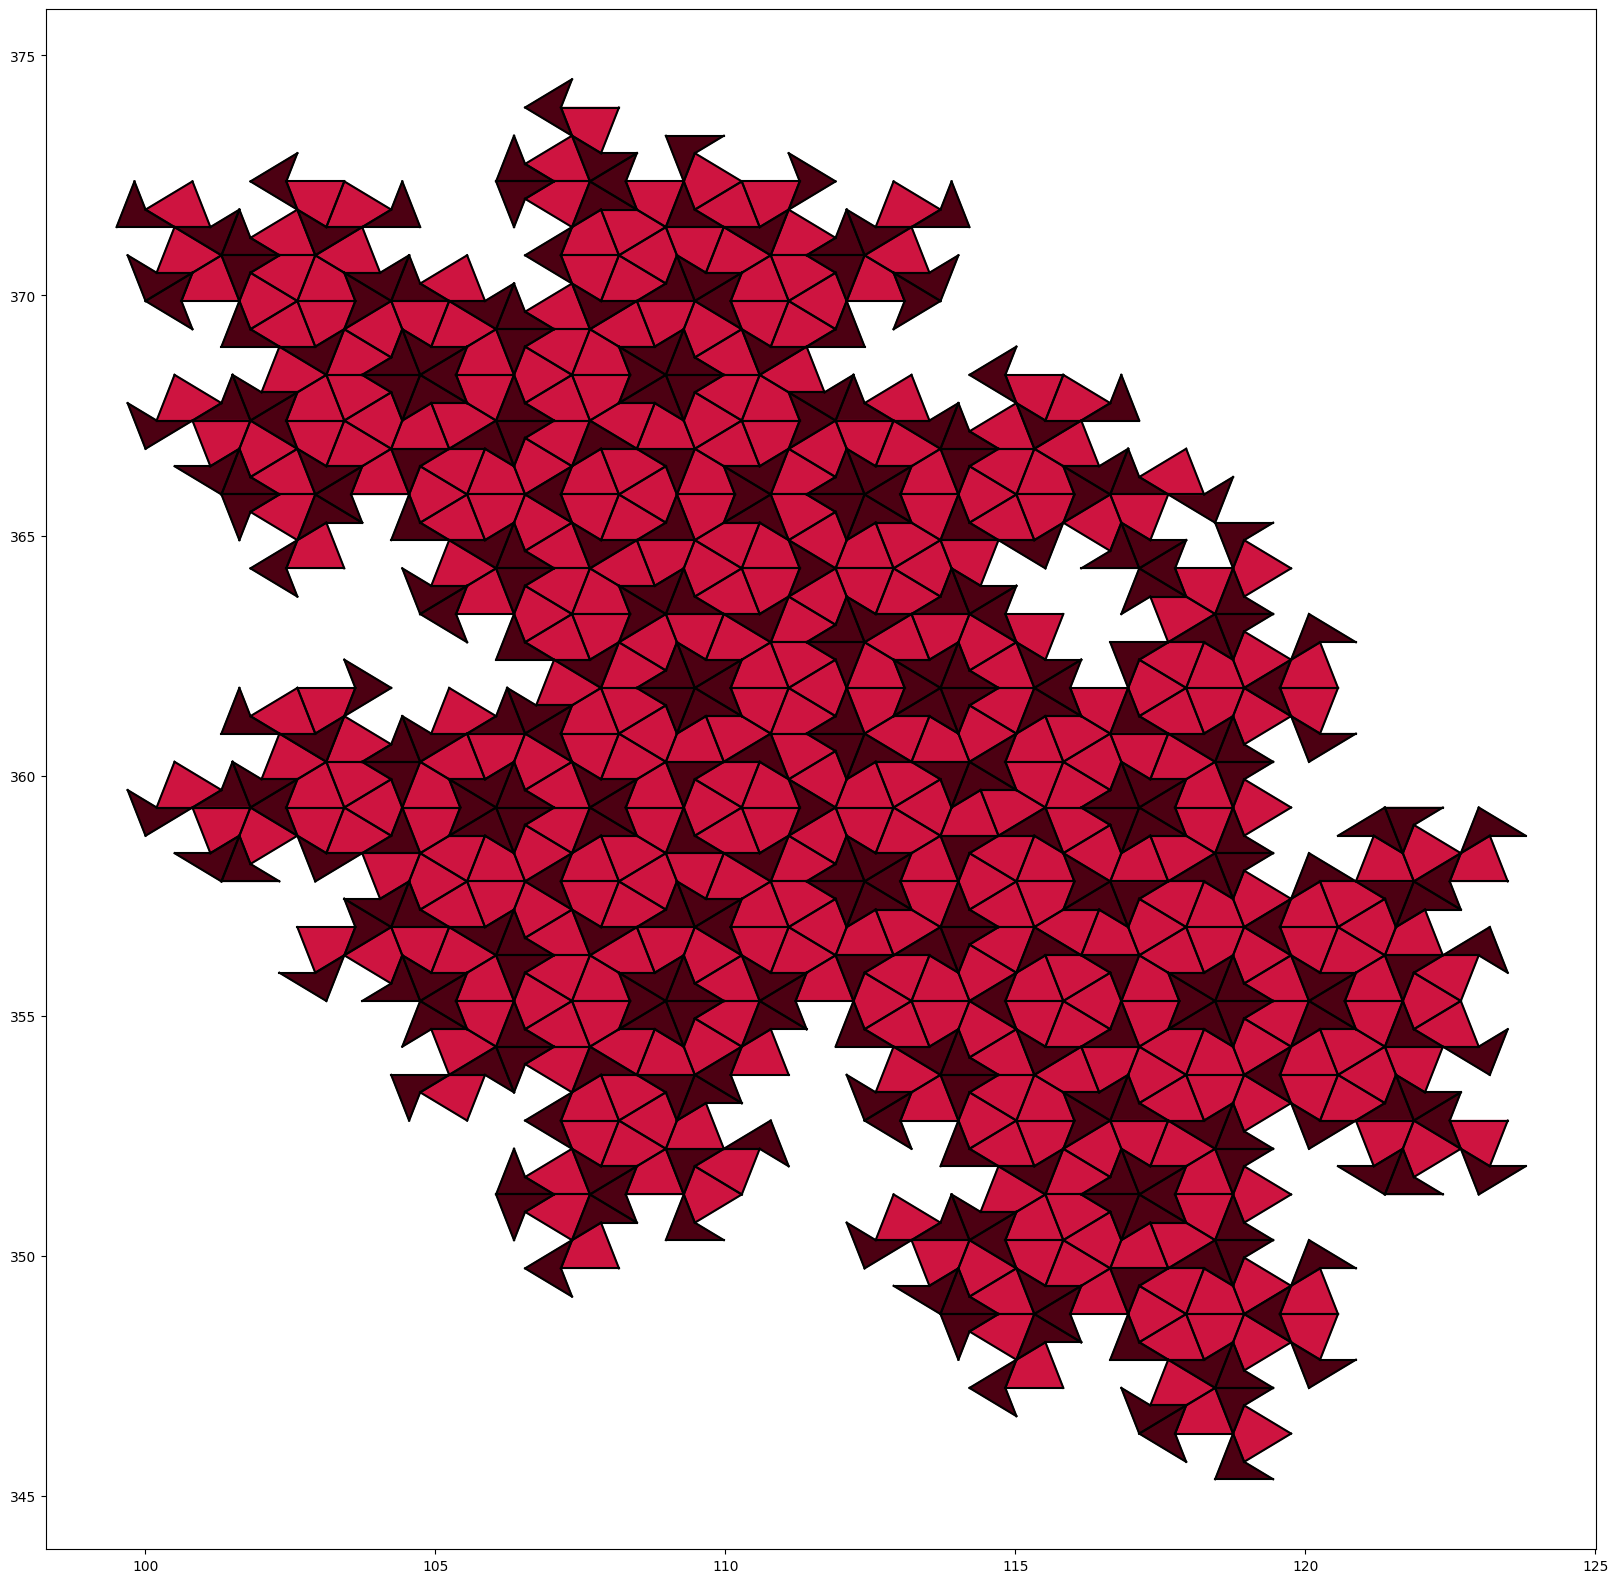

In [45]:
plt.figure(figsize=(20, 20))
def fill(results):
    for j in results:
        L_ss, Lx, Ly=graficaR2N(j[0])
        if j[3] == "Kite1" or j[3] == "Kite2" or j[3]=="Kitem":
            plt.fill(Lx, Ly, color='#ce1440')
        else:
            plt.fill(Lx, Ly, color='#4c0012')
fill(result)